In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [2]:
df = pd.read_csv('/content/Avacado.zip')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

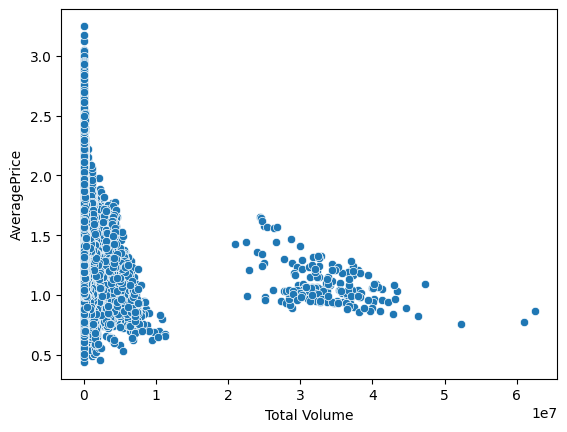

In [11]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice')
plt.show()

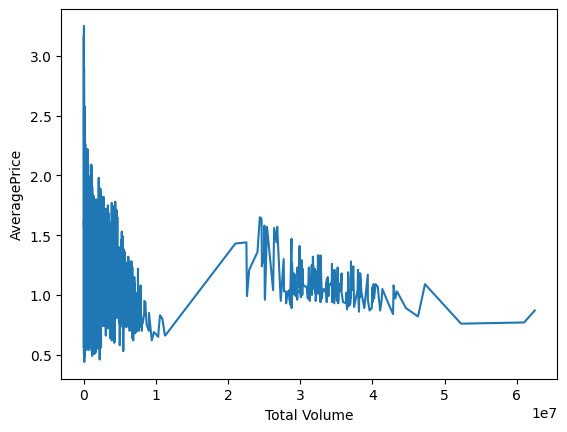

In [12]:
sns.lineplot(data=df, x='Total Volume', y='AveragePrice')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
df['type'].value_counts()

,count
type,
conventional,9126
organic,9123


In [15]:
df.replace({'type':{'conventional':0, 'organic':1}}, inplace=True)

/tmp/ipython-input-1630398418.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'type':{'conventional':0, 'organic':1}}, inplace=True)


In [16]:
df['region'].value_counts()

,count
region,
Albany,338
Atlanta,338
BaltimoreWashington,338
Boise,338
Boston,338
BuffaloRochester,338
California,338
Charlotte,338
Chicago,338


In [17]:
#we will scale or normalise the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  float64
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  year          18249 non-null  float64
 13  region        18249 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 1.9+ MB


In [18]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.565327,2015-12-27,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,-1.221282,Albany
1,-1.500730,2015-12-20,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,-1.221282,Albany
2,-1.436133,2015-12-13,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,-1.221282,Albany
3,-1.371536,2015-12-06,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,-1.221282,Albany
4,-1.306939,2015-11-29,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,-1.221282,Albany


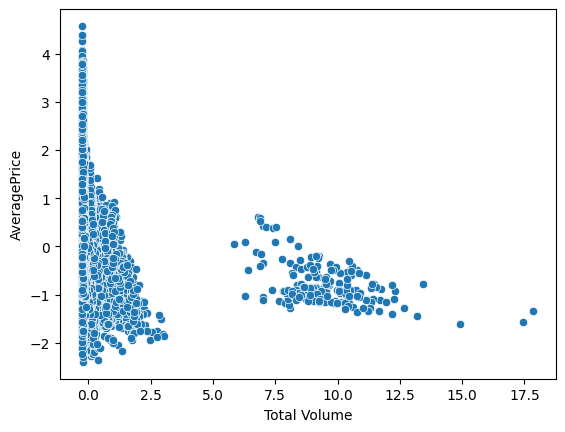

In [19]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice')
plt.show()

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract only useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday  # 0=Monday

# Drop what’s not helpful
df.drop(columns=['Date', 'Week', 'Day'], errors='ignore', inplace=True)


In [21]:
df.drop(columns=['year'], inplace=True)

In [22]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Weekday
count,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.0
mean,1.059059e-16,1.495142e-16,-2.491903e-17,-6.229757e-18,-2.180415e-17,5.295294e-17,3.737854e-17,-9.344636e-18,-1.868927e-17,2.803391e-17,0.499918,2016.147899,6.177215,6.0
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,0.500014,0.939938,3.534130,0.0
min,-1.565327e+00,-2.398960e+00,-2.462926e-01,-2.316356e-01,-2.451272e-01,-2.125395e-01,-2.429887e-01,-2.441771e-01,-2.227343e-01,-1.755796e-01,0.000000,2015.000000,1.000000,6.0
25%,-9.193580e-01,-7.598823e-01,-2.431786e-01,-2.309604e-01,-2.426284e-01,-2.125395e-01,-2.378289e-01,-2.403583e-01,-2.222117e-01,-1.755796e-01,0.000000,2015.000000,3.000000,6.0
50%,-1.500146e-02,-8.935061e-02,-2.152245e-01,-2.248011e-01,-2.209919e-01,-2.108181e-01,-2.026894e-01,-2.088456e-01,-2.118812e-01,-1.755796e-01,0.000000,2016.000000,6.000000,6.0
75%,8.893551e-01,6.308501e-01,-1.209462e-01,-1.438694e-01,-1.203797e-01,-1.544402e-01,-1.306569e-01,-1.324880e-01,-1.324354e-01,-1.680905e-01,1.000000,2017.000000,9.000000,6.0
max,1.793712e+00,4.579537e+00,1.785316e+01,1.774816e+01,1.675578e+01,2.348384e+01,1.940093e+01,1.769383e+01,2.322010e+01,3.100692e+01,1.000000,2018.000000,12.000000,6.0


In [23]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [25]:
models = {
    'lg' : LinearRegression(),
    'rf' : RandomForestRegressor(),
    'xg' : XGBRegressor()
}

In [28]:
print(x_train.select_dtypes(include='object').columns)


Index(['region'], dtype='object')


In [29]:
# 1. Combine x_train and x_test for consistent one-hot encoding
combined = pd.concat([x_train, x_test])

# 2. Apply one-hot encoding to the 'region' column
combined_encoded = pd.get_dummies(combined, columns=['region'], drop_first=True)

# 3. Split back to x_train and x_test
x_train_encoded = combined_encoded.iloc[:len(x_train), :]
x_test_encoded = combined_encoded.iloc[len(x_train):, :]


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, model in models.items():
    model.fit(x_train_encoded, y_train)
    y_pred = model.predict(x_test_encoded)

    print(f"\n{name} Results:")
    print(f"  MAE  : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"  MSE  : {mean_squared_error(y_test, y_pred):.4f}")
    print(f"  R²   : {r2_score(y_test, y_pred):.4f}")



lg Results:
  MAE  : 0.4809
  MSE  : 0.4045
  R²   : 0.5918

rf Results:
  MAE  : 0.2097
  MSE  : 0.0887
  R²   : 0.9105

xg Results:
  MAE  : 0.2176
  MSE  : 0.0906
  R²   : 0.9086


In [ ]:
#select RandomForest as the r2 score is 91